# Introduction to Clustering

## What is Clustering?
Clustering is a technique used to group similar data points together.

- It is an **unsupervised learning** method, meaning we don't need labeled data.
- **Applications**: Customer segmentation, image segmentation, social network analysis, etc.

## Types of Clustering Algorithms
1. **K-Means**: Groups data into spherical clusters.
2. **Hierarchical Clustering**: Builds a tree-like structure of clusters.
3. **DBSCAN**: Groups data based on density.
4. **Spectral Clustering**: Uses graph theory to group data.

---

# What is Spectral Clustering?

## Theory
Spectral Clustering is a technique that uses **graph theory** to cluster data.

It works by:
1. Creating a **similarity graph** (e.g., using a distance metric like Euclidean distance).
2. Computing the **graph Laplacian** (a matrix representation of the graph).
3. Performing **eigenvalue decomposition** on the Laplacian to find clusters.

## Why Use Spectral Clustering?
- Works well for **non-spherical** or **complex-shaped** clusters.
- Can handle **non-linear** relationships between data points.

---

# How Does Spectral Clustering Work?

## Step-by-Step Process
1. **Input Data**: A dataset with features (e.g., 2D points).
2. **Similarity Graph**: Create a graph where each data point is a node, and edges represent similarity between points.
3. **Graph Laplacian**: Compute the Laplacian matrix of the graph.
4. **Eigenvalue Decomposition**: Find the eigenvalues and eigenvectors of the Laplacian.
5. **Clustering**: Use the eigenvectors to group data points into clusters.

---

## Key Concepts

### 1. **Affinity Matrix**
   - The affinity matrix (or similarity matrix) defines how similar each pair of data points is. Common methods to compute similarity include:
     - **RBF Kernel**: `exp(-gamma * ||x - y||^2)`
     - **Nearest Neighbors**: Points are similar if they are within a certain distance or are neighbors.

### 2. **Graph Laplacian**
   - The graph Laplacian is derived from the affinity matrix and is used to capture the structure of the data. It helps in transforming the data into a lower-dimensional space where clustering is easier.

### 3. **Eigenvalue Decomposition**
   - Spectral Clustering uses the eigenvalues and eigenvectors of the graph Laplacian to perform dimensionality reduction. The eigenvectors corresponding to the smallest eigenvalues are used to represent the data in a lower-dimensional space.

### 4. **Clustering in Lower-Dimensional Space**
   - After dimensionality reduction, traditional clustering algorithms like K-Means are applied to the transformed data to assign clusters.

---

## Applications of Spectral Clustering
- **Image Segmentation**: Grouping pixels with similar properties.
- **Social Network Analysis**: Identifying communities in networks.
- **Bioinformatics**: Clustering gene expression data.
- **Anomaly Detection**: Identifying outliers in complex datasets.

# Introduction to Spectral Clustering with Code Example

In this section, we will explore **Spectral Clustering**, a powerful clustering algorithm that uses **graph theory** to group data points. Unlike traditional clustering methods like K-Means, Spectral Clustering is particularly effective for identifying **non-spherical** or **complex-shaped clusters**.

## What Are We About to Do?
In this code, we will:
1. **Generate Synthetic Datasets**: We will create two synthetic datasets (`moons` and `circles`) to demonstrate how Spectral Clustering works.
2. **Normalize the Data**: We will scale the data to have zero mean and unit variance, which is a common preprocessing step for clustering algorithms.
3. **Apply Spectral Clustering**: We will use the `SpectralClustering` algorithm from the `scikit-learn` library to cluster the data.
4. **Visualize the Results**: We will plot the clustered data to see how well the algorithm performs.

## Key Concepts to Understand
1. **Synthetic Datasets**:
   - `make_moons`: Generates two interleaving half circles.
   - `make_circles`: Generates a smaller circle inside a larger one.
   These datasets are useful for testing clustering algorithms because they have non-linear structures.

2. **Normalization**:
   - We use `StandardScaler` to scale the data so that each feature has a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the clustering process.

3. **Spectral Clustering**:
   - The algorithm works by creating a **similarity graph** from the data and then performing **eigenvalue decomposition** on the graph's Laplacian matrix.
   - Key parameters:
     - `n_clusters`: The number of clusters to find.
     - `affinity`: The method used to construct the similarity graph (e.g., `rbf` for radial basis function).
     - `gamma`: A parameter that controls the influence of individual data points.

4. **Visualization**:
   - We will use `matplotlib` to create scatter plots of the clustered data, with different colors representing different clusters.

## How to Use This Code
- Run each cell step by step to see how the data is generated, normalized, clustered, and visualized.
- Experiment with the parameters (e.g., `gamma`, `affinity`) to see how they affect the clustering results.

Step 1:  Import necessary libraries

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

Step 2: Generate synthetic datasets

1. Moons dataset: Two interleaving half circles

In [30]:
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

2.  Circles dataset: A smaller circle inside a larger one

In [31]:
X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

Step 3: Normalize the data to have zero mean and unit variance

In [32]:
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)  # Normalize Moons dataset
X_circles = scaler.fit_transform(X_circles)  # Normalize Circles dataset

Step 4: Apply Spectral Clustering to the Moons dataset

In [33]:
spectral_moons = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42)
labels_moons = spectral_moons.fit_predict(X_moons)  # Predict cluster labels for Moons

Step 5: Apply Spectral Clustering to the Circles dataset

In [34]:
spectral_circles = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42)
labels_circles = spectral_circles.fit_predict(X_circles)  # Predict cluster labels for Circles

Step 6: Write the Function to visualize the clustering results

In [35]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))  # Create a new figure
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)  # Scatter plot with cluster colors
    plt.title(title)  # Add a title to the plot
    plt.xlabel("Feature 1")  # Label for the x-axis
    plt.ylabel("Feature 2")  # Label for the y-axis
    plt.show()  # Display the plot

Step 7: Visualize the clustering results for the Moons dataset

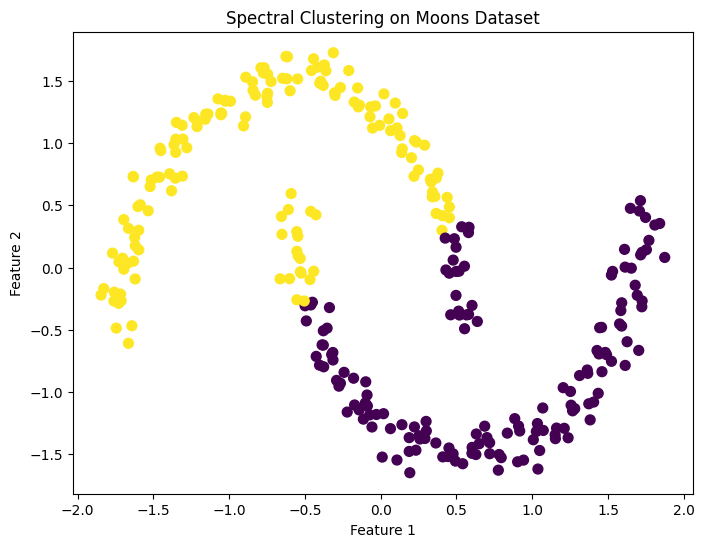

In [36]:
plot_clusters(X_moons, labels_moons, "Spectral Clustering on Moons Dataset")

Step 8: Visualize the clustering results for the Circles dataset

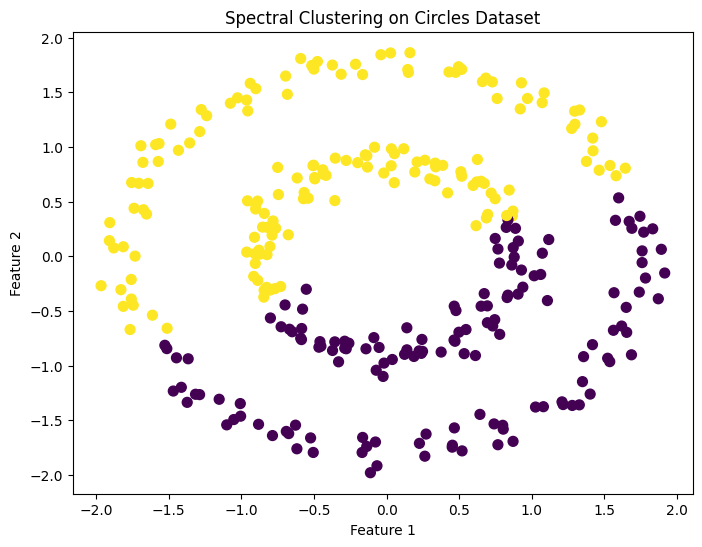

In [37]:
plot_clusters(X_circles, labels_circles, "Spectral Clustering on Circles Dataset")

Outcomes: The output shows that Spectral Clustering successfully separates the two interleaved crescent shapes in the Moons dataset and distinguishes the inner and outer circles in the Circles dataset. Unlike K-Means, which assumes spherical clusters and would fail on such non-linearly separable data, Spectral Clustering transforms the data into a graph-based space, making it effective for complex patterns. This demonstrates its advantage in handling datasets where traditional distance-based clustering methods struggle.

Spectral Clustering has several key parameters that can significantly affect the results:

### 1. **`n_clusters`**
   - The number of clusters to find. This must be specified in advance only.
   - **Effect**: Choosing the wrong number of clusters can lead to over-segmentation or under-segmentation.

### 2. **`affinity`**
   - The method used to construct the affinity matrix. Common options are:
     - `rbf`: Radial Basis Function (Gaussian) kernel.
     - `nearest_neighbors`: Constructs the affinity matrix based on nearest neighbors.
   - **Effect**: The choice of affinity affects how similarity is measured between points.

### 3. **`gamma`**
   - The kernel coefficient for the `rbf` affinity. It controls the influence of each point on its neighbors.
   - **Effect**: A small gamma makes the kernel behave like a linear model, while a large gamma makes it focus on local neighborhoods.

### 4. **`eigen_solver`**
   - The method used for eigenvalue decomposition. Options include `arpack`, `lobpcg`, and `amg`.
   - **Effect**: Different solvers may have varying performance and accuracy.

Let's see how changing `gamma` and `affinity` affects the clustering results.
In this code, we experiment with **different parameters** for **Spectral Clustering** on the **Moons** and **Circles** datasets. We test multiple values of **gamma** and different **affinity types** (`rbf` and `nearest_neighbors`) to observe how they impact clustering results. The function `setup_spectral_clustering` configures the model based on these parameters, and `experiment_parameters` runs multiple clustering experiments, visualizing the results in a grid of subplots. This helps us analyze the **effectiveness of different parameter settings** and determine the best configuration for clustering non-linearly separable data.

Step 1: Import necessary libraries

In [38]:
import warnings
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

Step 2: Write the function to set up the SpectralClustering model based on parameters

In [39]:
def setup_spectral_clustering(affinity, gamma, n_neighbors=10):
    if affinity == 'nearest_neighbors':
        # Use 'nearest_neighbors' affinity with a fixed number of neighbors
        return SpectralClustering(n_clusters=2, affinity=affinity, n_neighbors=n_neighbors, random_state=42)
    else:
        # Use 'rbf' affinity with the specified gamma value
        return SpectralClustering(n_clusters=2, affinity=affinity, gamma=gamma, random_state=42)

Step 3: Write the function to plot the clusters on a 2D graph

In [40]:
def plot_clusters(X, labels, gamma, affinity, position, gammas, affinities):
    # Create a subplot for the current combination of gamma and affinity
    plt.subplot(len(gammas), len(affinities), position)
    # Scatter plot of the data points, colored by cluster labels
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    # Add a title to the subplot
    plt.title(f"Gamma={gamma}, Affinity={affinity}")

Step 4: Main function to experiment with different parameters for SpectralClustering

In [41]:
def experiment_parameters(X, dataset_name):
    # Define the values of gamma and affinity to test
    gammas = [0.1, 1.0, 10.0, 50.0]
    affinities = ['rbf', 'nearest_neighbors']
    
    # Create a figure to hold all the subplots
    plt.figure(figsize=(15, 10))
    # Loop through each gamma and affinity combination
    for i, gamma in enumerate(gammas):
        for j, affinity in enumerate(affinities):
            # Suppress warnings to avoid clutter in the output
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=UserWarning)
                # Set up the SpectralClustering model
                spectral = setup_spectral_clustering(affinity, gamma)
                # Fit the model and predict cluster labels
                labels = spectral.fit_predict(X)
                # Plot the clusters for the current parameters
                plot_clusters(X, labels, gamma, affinity, i * len(affinities) + j + 1, gammas, affinities)
    
    # Add a main title for the entire figure
    plt.suptitle(f"Parameter Selection on {dataset_name} Dataset", fontsize=16)
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Display the plot
    plt.show()


Step 5: Generate synthetic datasets

In [42]:
from sklearn.datasets import make_moons, make_circles
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

Step 6: Normalize the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)
X_circles = scaler.fit_transform(X_circles)

Step 7:  Run the experiment on the Moons dataset

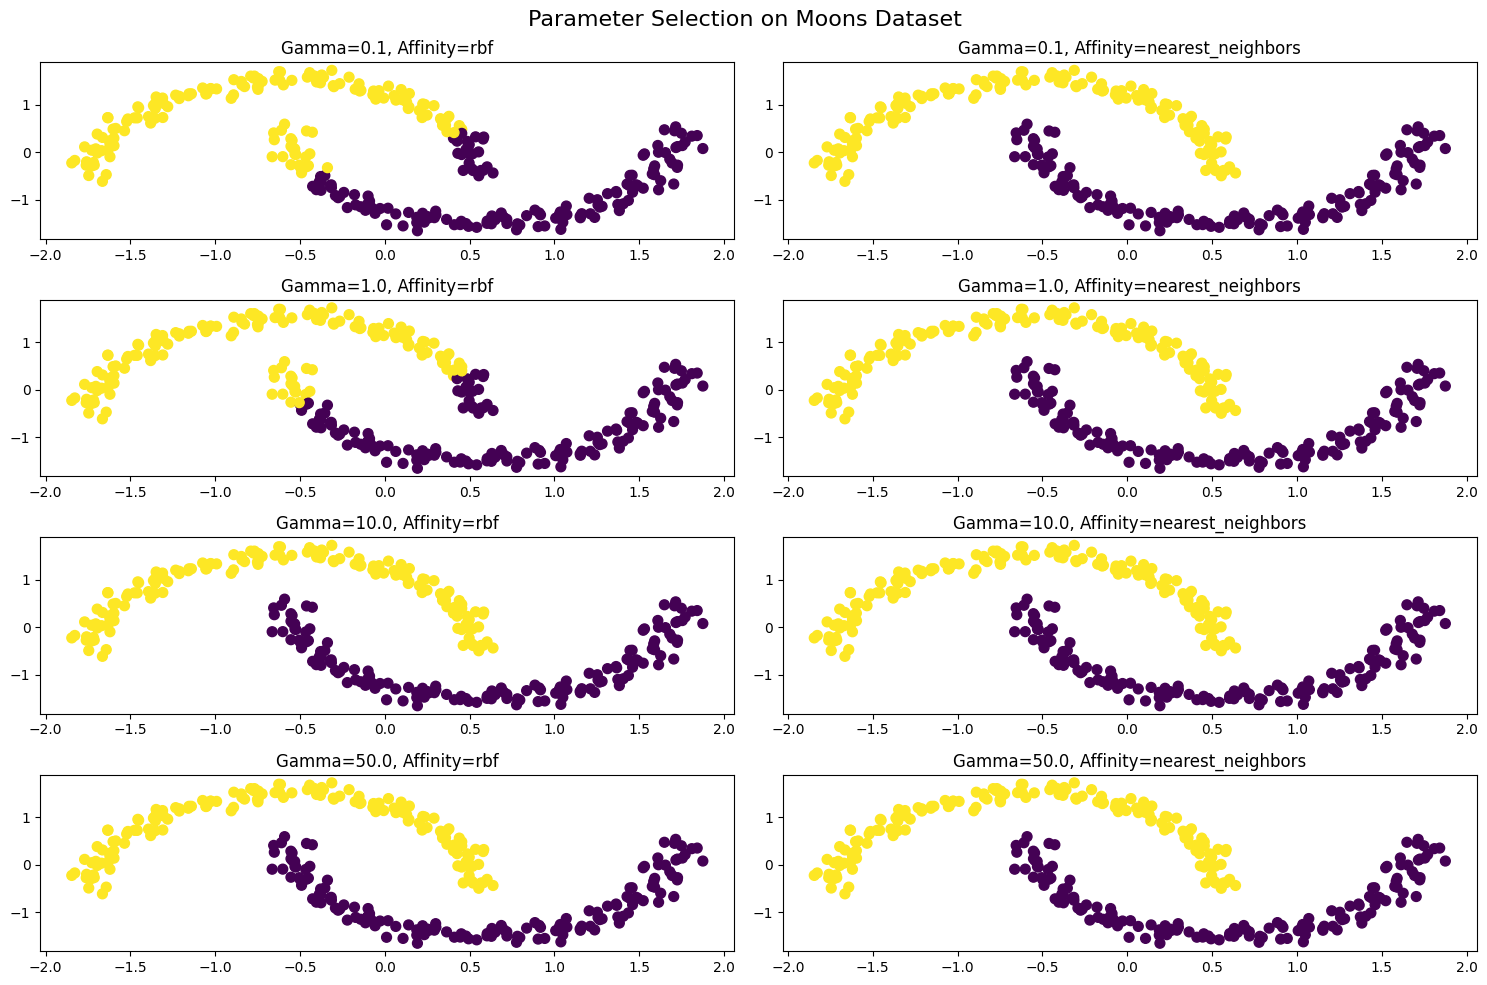

In [44]:
experiment_parameters(X_moons, "Moons")

Step 8:  Run the experiment on the Circles dataset

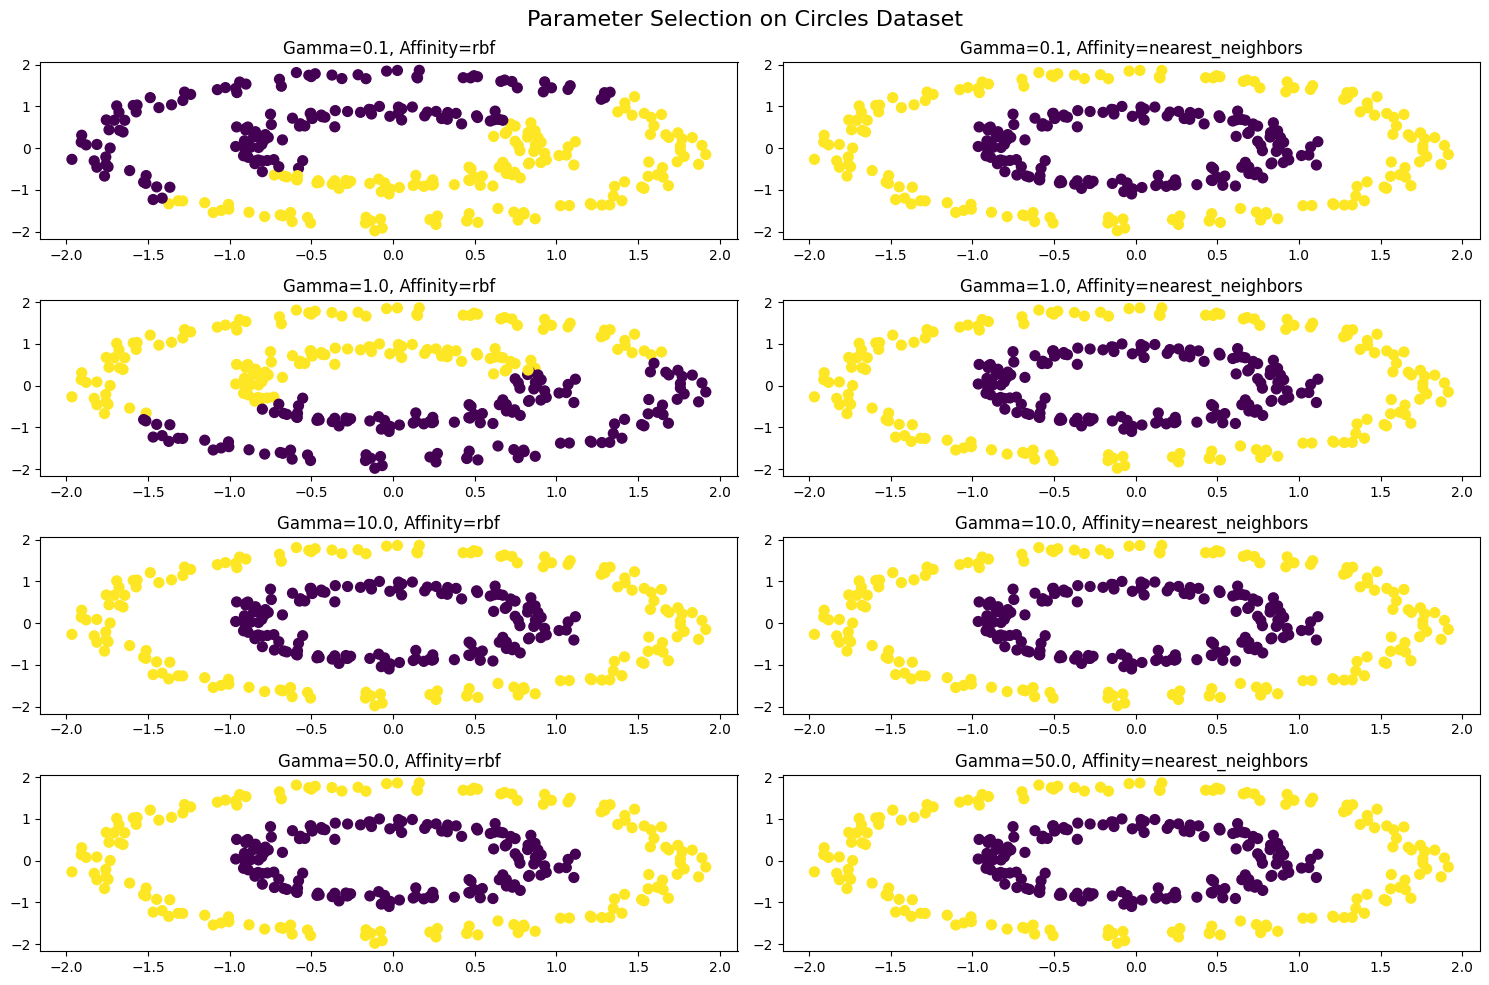

In [45]:
experiment_parameters(X_circles, "Circles")

Spectral Clustering is a versatile and powerful clustering technique, especially for non-linearly separable data. By understanding its key parameters and their effects, you can apply it effectively to a wide range of problems. Experiment with different datasets and parameters to gain a deeper understanding of its behavior.

---

# Exercise for Beginners
- Try changing the gamma parameter in the code. How does it affect the clustering?
- Experiment with the n_neighbors parameter for the nearest_neighbors affinity.
- Apply Spectral Clustering to a real-world dataset (e.g., Iris dataset).

--- 


## Resources
- [Scikit-learn Spectral Clustering Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

- [Wikipedia: Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering)